In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


This is one of my first machine learning projects. I will be doing a short EDA and then predicting the weight of a fish using Multiple Linear Regression.

I'm always looking to learn so do let me know how I could have done things different or improved it.

In [2]:
#Imported Stuff

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
#Reading the data and checking it

fish = pd.read_csv('/kaggle/input/fish-market/Fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
#Checking first few rows

fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Data Visualization

Lets look at some plots

<AxesSubplot:xlabel='Species', ylabel='count'>

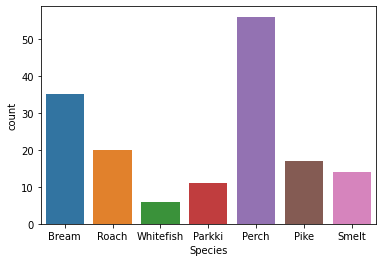

In [7]:
#Counts

sns.countplot(x = 'Species' , data = fish)

Let's see what the weights are for different species.

<AxesSubplot:xlabel='Species', ylabel='Weight'>

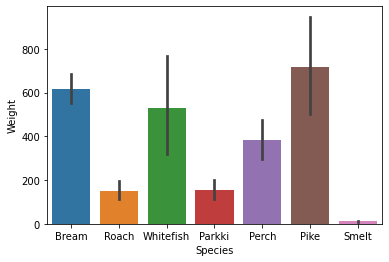

In [8]:
sns.barplot(x = 'Species' , y = 'Weight' , data = fish)

Let's look at lengths of the fish species.

Which variables are statistically significant?

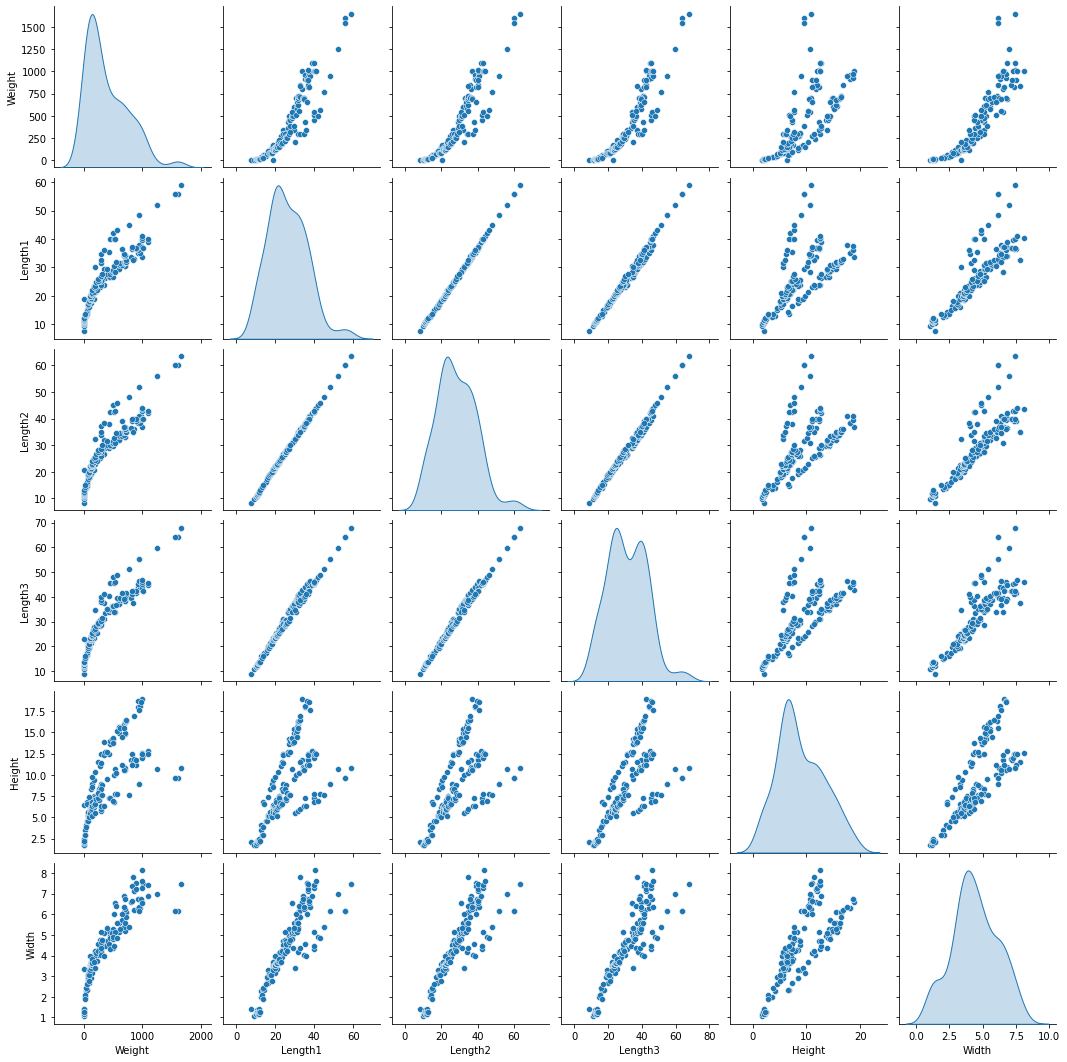

In [9]:
sns.pairplot(fish[["Weight", "Length1", "Length2", "Length3", "Height", "Width"]], diag_kind ="kde")

In [10]:
corr=fish.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Is it true that greater the width of the fish, more the weight?

<AxesSubplot:xlabel='Width', ylabel='Weight'>

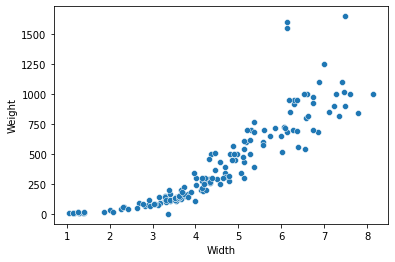

In [11]:
sns.scatterplot(x = 'Width' , y = 'Weight' , data = fish)

From this we can see that as the width of the fish increases, so does the weight.

<AxesSubplot:>

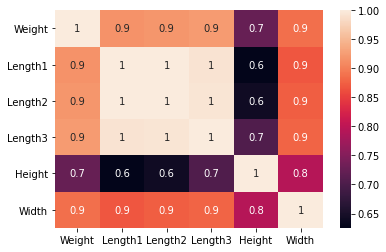

In [12]:
# Correlation Matrix

sns.heatmap(fish.corr(), annot = True, fmt='.1g')

# **Converting Categorical Data**

In [13]:
fish_dummy = pd.get_dummies(fish, columns=["Species"])
fish_dummy.shape

(159, 13)

In [14]:
fish_dummy.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


# Spliting Data into Training and Testing data

This will be an 80-20 split with 80% being testing data and 20% being validation data.

In [15]:
#Target Variable 
y = fish_dummy['Weight'].values

#Independant Variables
X = fish_dummy.iloc[:,1:13].values

In [16]:
#Train Test Split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 0)

Let's create the model.

In [17]:
#Model Creation

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's make weight predictions.

In [18]:
#Prediction based on validation data

predictions = model.predict(X_val)

In [19]:
#Checking Estimated Weight

predictions

array([ 397.95448408,  129.73611473,  209.04102524,  210.16019937,
        686.38064149,  872.32788233,  663.39415241,  419.50297878,
       1004.46289122,  142.00827627,  286.61124419,  525.68652152,
        719.58630018, 1017.54674762, -114.78767247,   26.88127378,
        163.9706359 ,  957.00081915,  182.99388776,  733.16938179,
       -103.66185149,  511.57632765,  168.02887639, 1126.05942468,
        -25.85713411,  477.0432793 ,  707.60331789,  240.51768894,
        888.25879301,   13.76772836,  585.88618243,  166.43036365,
        957.00081915,  343.15302525,  579.89225046,  270.64026817,
        377.03857408,  652.18899153,  707.90121252,  161.16410198,
        655.892628  ,  -98.43936493,  224.9093039 ,  755.54688342,
        145.87863781,  280.93851751,  230.81178722,  289.39592699])

In [20]:
#Checking Actual Salaries

y_val

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ,
       1550. ,  300. ,  700. ,  225. ,  300. ,  620. ,  700. ,  135. ,
        514. ,   40. ,  145. ,  714. ,   19.7,  197. ,  180. ,  218. ])

Let's look at the error and how accurate our model was.

In [21]:
#Calculating Error

error = y_val - predictions
print(error)

[  -7.95448408 -129.73611473  -39.04102524  -50.16019937 -130.38064149
   27.67211767  136.60584759 -119.50297878  -29.46289122  -27.00827627
  -86.61124419  -69.68652152  280.41369982  -17.54674762  174.78767247
   51.11872622  -18.9706359   642.99918085  -52.99388776  -13.16938179
  158.66185149 -121.57632765  -48.02887639  523.94057532  115.85713411
  -27.0432793    -7.60331789   29.48231106  -38.25879301   -4.06772836
   64.11381757  -56.43036365  592.99918085  -43.15302525  120.10774954
  -45.64026817  -77.03857408  -32.18899153   -7.90121252  -26.16410198
 -141.892628    138.43936493  -79.9093039   -41.54688342 -126.17863781
  -83.93851751  -50.81178722  -71.39592699]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

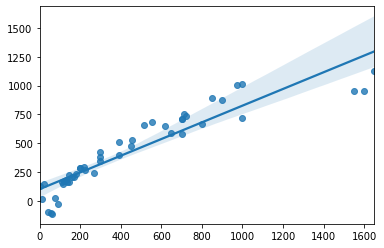

In [22]:
plt.figure()
sns.regplot(y_val,predictions)

In [23]:
#Accuracy

acc = model.score(X_val, y_val)
print("Accuracy: ", acc)

Accuracy:  0.831552783714338


Final accuracy of the model was 83%